## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


Fit polynomial models of increasing degree. Calculate the evidence to see which one is the best model.

Polynomial degree  0   blue
Fit params           3.259
    stdev            0.811
    chisq          276.040
    evidence       -29.627
Polynomial degree  1   green
Fit params       [    2.192    2.133]
    stdev        [    0.399    0.250]
    chisq           57.160
    evidence       -25.308
Polynomial degree  2   red
Fit params       [    0.712    1.408    0.725]
    stdev        [    0.249    0.141    0.084]
    chisq           11.090
    evidence       -21.539
Polynomial degree  3   mint
Fit params       [    1.228    0.508    0.324    0.267]
    stdev        [    0.040    0.037    0.018    0.009]
    chisq            0.213
    evidence       -10.049
Polynomial degree  4   magenta
Fit params       [    1.246    0.545    0.294    0.254    0.007]
    stdev        [    0.043    0.052    0.035    0.017    0.007]
    chisq            0.201
    evidence       -13.910
Polynomial degree  5   yellow
Fit params       [    1.191    0.613    0.417    0.192   -0.024    0.012]
    stdev        

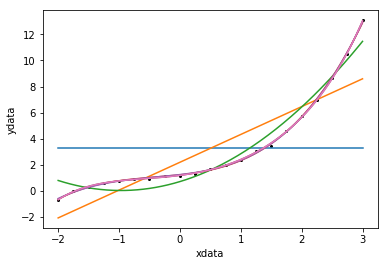

In [4]:
plotFit( x, y, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree. The plot peaks at 3. Before that point the fit really improves. Afterwards the fit stays more or less the same, but the penalty for introducing an extra parameter make the evidence turn downward.

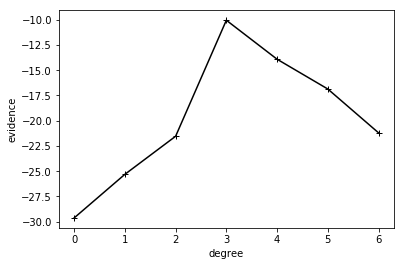

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()